In [2]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

# 3-Site

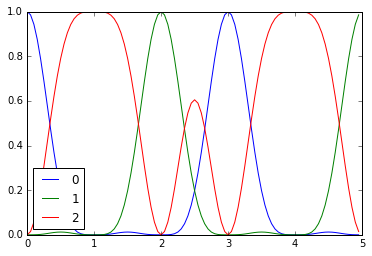

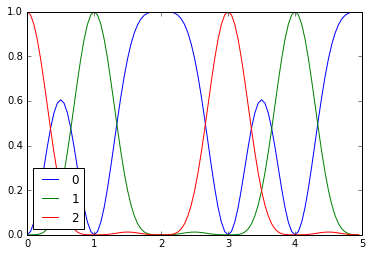

In [5]:
L = 3

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 5
# Time steps per second
n = 20
N = n*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightfore = np.empty((L, N))
weightback = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore[L-1-j, i] = front - fronthere
        weightback[j, i]     = back  - backhere
        front = fronthere
        back  = backhere
        
for i in range(L):
    plt.plot(np.arange(N)/n,weightfore[i], label = str(i))
# plt.legend(loc=3)
plt.show()

for i in range(L):
    plt.plot(np.arange(N)/n,weightback[i], label = str(i))
# plt.legend(loc=3)
plt.show()

# 4-Site

In [5]:
L = 4

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
vecsd = vecs.T.conj()

# Total time elapsed
end = 9
# Time steps per second
n = 20
N = n*end
A = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))
Alist = hm.arr2list(A)
B = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    B = np.kron(np.array([1,1]),B)
Blist = hm.arr2list(B)


weightfore4 = np.empty((L, N))
weightback4 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = np.matmul(vecs * np.exp(-1j*vals*t), vecsd)
    uninv = np.matmul(vecs * np.exp( 1j*vals*t), vecsd)
    
    ulist = hm.mat2list(unitt)
    uinvlist = hm.mat2list(uninv)
    
    Atlist = []
    for idx, val in enumerate(Alist):
        Atlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    Btlist = []
    for idx, val in enumerate(Blist):
        Btlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    At = hm.list2mat(Atlist)
    Bt = hm.list2mat(Btlist)
    
    front = 1
    back  = 1
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore4[L-1-j, i] = front - fronthere
        weightback4[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

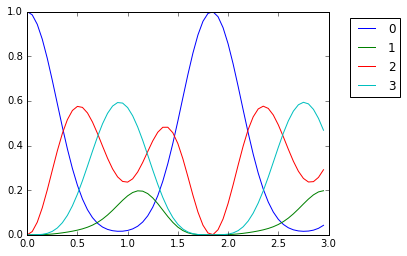

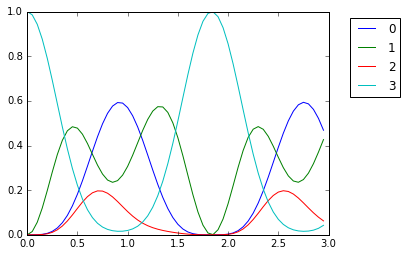

In [7]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore4[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback4[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

# 5-Site

In [5]:
L = 5

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
vecsd = vecs.T.conj()

# Total time elapsed
end = 3
# Time steps per second
n = 20
N = n*end
A = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))
Alist = hm.arr2list(A)
B = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    B = np.kron(np.array([1,1]),B)
Blist = hm.arr2list(B)


weightfore5 = np.empty((L, N))
weightback5 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = np.matmul(vecs * np.exp(-1j*vals*t), vecsd)
    uninv = np.matmul(vecs * np.exp( 1j*vals*t), vecsd)
    
    ulist = hm.mat2list(unitt)
    uinvlist = hm.mat2list(uninv)
    
    Atlist = []
    for idx, val in enumerate(Alist):
        Atlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    Btlist = []
    for idx, val in enumerate(Blist):
        Btlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    At = hm.list2mat(Atlist)
    Bt = hm.list2mat(Btlist)
    
    front = 1
    back  = 1
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore5[L-1-j, i] = front - fronthere
        weightback5[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

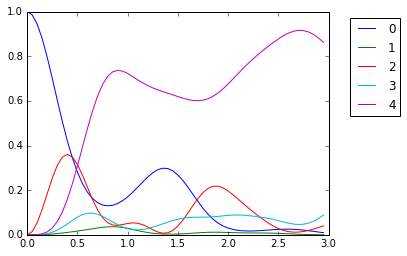

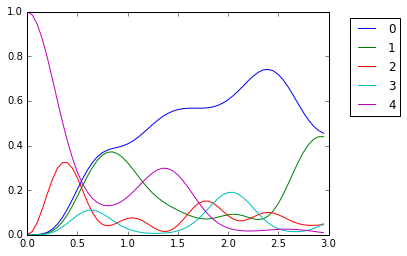

In [6]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore5[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback5[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

# 6-Site

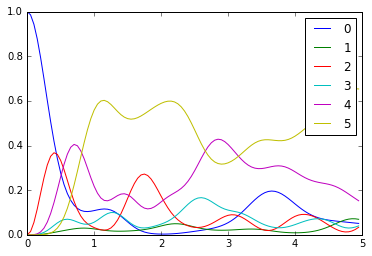

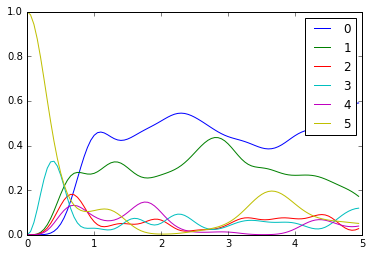

In [10]:
L = 6

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 5
# Time steps per second
n = 20
N = n*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightfore = np.empty((L, N))
weightback = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore[L-1-j, i] = front - fronthere
        weightback[j, i]     = back  - backhere
        front = fronthere
        back  = backhere
        
for i in range(L):
    plt.plot(np.arange(N)/n,weightfore[i], label = str(i))
plt.legend(loc=1)
plt.show()

for i in range(L):
    plt.plot(np.arange(N)/n,weightback[i], label = str(i))
plt.legend(loc=1)
plt.show()

In [7]:
L = 6

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
vecsd = vecs.T.conj()

# Total time elapsed
end = 3
# Time steps per second
n = 20
N = n*end
A = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))
Alist = hm.arr2list(A)
B = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    B = np.kron(np.array([1,1]),B)
Blist = hm.arr2list(B)


weightfore6 = np.empty((L, N))
weightback6 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = np.matmul(vecs * np.exp(-1j*vals*t), vecsd)
    uninv = np.matmul(vecs * np.exp( 1j*vals*t), vecsd)
    
    ulist = hm.mat2list(unitt)
    uinvlist = hm.mat2list(uninv)
    
    Atlist = []
    for idx, val in enumerate(Alist):
        Atlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    Btlist = []
    for idx, val in enumerate(Blist):
        Btlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    At = hm.list2mat(Atlist)
    Bt = hm.list2mat(Btlist)
    
    front = 1
    back  = 1
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore6[L-1-j, i] = front - fronthere
        weightback6[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

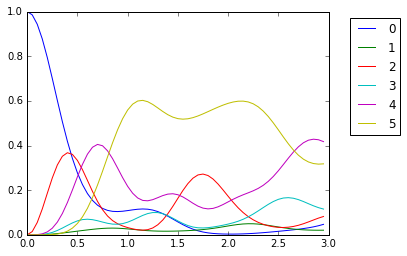

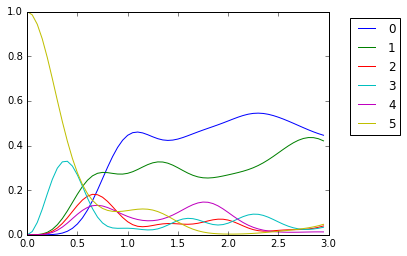

In [8]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore6[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback6[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

# 9-Site

In [9]:
L = 9

H = hm.dense_H(L)
vals, vecs = la.eigh(H)
vecsd = vecs.T.conj()

# Total time elapsed
end = 3
# Time steps per second
n = 20
N = n*end
A = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))
Alist = hm.arr2list(A)
B = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    B = np.kron(np.array([1,1]),B)
Blist = hm.arr2list(B)


weightfore9 = np.empty((L, N))
weightback9 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = np.matmul(vecs * np.exp(-1j*vals*t), vecsd)
    uninv = np.matmul(vecs * np.exp( 1j*vals*t), vecsd)
    
    ulist = hm.mat2list(unitt)
    uinvlist = hm.mat2list(uninv)
    
    Atlist = []
    for idx, val in enumerate(Alist):
        Atlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    Btlist = []
    for idx, val in enumerate(Blist):
        Btlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    At = hm.list2mat(Atlist)
    Bt = hm.list2mat(Btlist)
    
    front = 1
    back  = 1
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore9[L-1-j, i] = front - fronthere
        weightback9[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

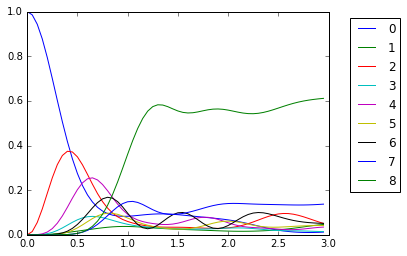

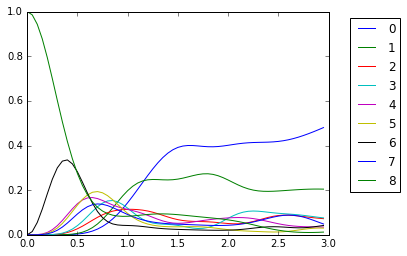

In [10]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()